# 데이터 전처리
### csv 파일 읽기   

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import datetime

In [2]:
concept = pd.read_csv('data/concept.csv')
condition = pd.read_csv('data/condition_occurrence.csv')
death = pd.read_csv('data/death.csv')
drug = pd.read_csv('data/drug_exposure.csv')
person = pd.read_csv('data/person.csv')
visit = pd.read_csv('data/visit_occurrence.csv')

C:\Users\ZeusRyu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
concept[(concept['concept_id']<=9203) & (concept['concept_id']>=9201)]

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
731,9201,Inpatient Visit,Visit,Visit,Visit,S,IP,1970-01-01,2099-12-31,NaN
732,9202,Outpatient Visit,Visit,Visit,Visit,S,OP,1970-01-01,2099-12-31,NaN
733,9203,Emergency Room Visit,Visit,Visit,Visit,S,ER,1970-01-01,2099-12-31,NaN


### visit 
* 환자 별 방문 날짜 순으로 재정렬
* 다음 재방문까지 기간 추가(-1이면 마지막 방문)
* 각 방문시점에서 병원 방문횟수 추가

In [4]:
v = visit.sort_values(by = ['person_id','visit_start_date'])
v = v[['visit_occurrence_id','person_id','visit_concept_id','visit_start_datetime','visit_end_datetime']]
v

,visit_occurrence_id,person_id,visit_concept_id,visit_start_datetime,visit_end_datetime
28960,57618647,2955,9202,1987-05-11 13:28:53,1987-05-11 14:13:53
28961,57618653,2955,9202,2009-03-30 13:28:53,2009-03-30 13:43:53
28962,57618648,2955,9202,2011-03-05 13:28:53,2011-03-05 13:43:53
28963,57618654,2955,9202,2011-04-04 13:28:53,2011-04-04 13:58:53
28964,57618655,2955,9202,2013-04-08 13:28:53,2013-04-08 13:43:53
...,...,...,...,...,...
13898,26242297,2845932,9202,2016-09-19 19:24:10,2016-09-19 19:39:10
13899,26242298,2845932,9202,2017-09-25 19:24:10,2017-09-25 19:54:10
13900,26242299,2845932,9202,2018-10-01 19:24:10,2018-10-01 19:54:10
13901,26242300,2845932,9202,2019-10-07 19:24:10,2019-10-07 19:54:10


In [5]:
v['visit_start_datetime'] = pd.to_datetime(v['visit_start_datetime'])
v['visit_end_datetime'] = pd.to_datetime(v['visit_end_datetime'])
cnt = 0
ervcnt = 0
ivcnt = 0
#v['revisit_date'].fill
for i in range(len(v)):
    cnt+=1
    v.loc[i,'visit_count'] = cnt
    v.loc[i,'label'] = 0
    if v.loc[i,'visit_concept_id'] == 9203:
        ervcnt += 1
    v.loc[i,'erv_count'] = ervcnt
    if v.loc[i,'visit_concept_id'] == 9201:
        ivcnt += 1
    v.loc[i,'iv_count'] = ivcnt
    if i < len(v)-1 and v.loc[i,'person_id'] == v.loc[i+1,'person_id']:
        tmp = (v.loc[i+1,'visit_start_datetime']-v.loc[i,'visit_end_datetime'])/np.timedelta64(1,'D')
        if tmp <= 30 and v.loc[i+1,'visit_concept_id']==9203:
            v.loc[i,'label'] = 1
        v.loc[i,'revisit_date'] = tmp
    else:
        cnt = 0
        ervcnt = 0
        ivcnt = 0


"\ndf['birth_datetime'] = pd.to_datetime(df['birth_datetime'])\ndf['age'] = df['visit_start_datetime']-df['birth_datetime']\ndf['age'] = df['age']/ np.timedelta64(1,'Y')\ndf['age'] = df['age'].astype('int')\ndf.sort_values(by=['age'])\n"

In [6]:
v

,visit_occurrence_id,person_id,visit_concept_id,visit_start_datetime,visit_end_datetime,visit_count,label,erv_count,iv_count,revisit_date
28960,57618647,2955,9202,1987-05-11 13:28:53,1987-05-11 14:13:53,1.0,0.0,0.0,0.0,7993.968750
28961,57618653,2955,9202,2009-03-30 13:28:53,2009-03-30 13:43:53,2.0,0.0,0.0,0.0,704.989583
28962,57618648,2955,9202,2011-03-05 13:28:53,2011-03-05 13:43:53,3.0,0.0,0.0,0.0,29.989583
28963,57618654,2955,9202,2011-04-04 13:28:53,2011-04-04 13:58:53,4.0,0.0,0.0,0.0,734.979167
28964,57618655,2955,9202,2013-04-08 13:28:53,2013-04-08 13:43:53,5.0,0.0,0.0,0.0,723.989583
...,...,...,...,...,...,...,...,...,...,...
13898,26242297,2845932,9202,2016-09-19 19:24:10,2016-09-19 19:39:10,17.0,0.0,1.0,0.0,370.989583
13899,26242298,2845932,9202,2017-09-25 19:24:10,2017-09-25 19:54:10,18.0,0.0,1.0,0.0,370.979167
13900,26242299,2845932,9202,2018-10-01 19:24:10,2018-10-01 19:54:10,19.0,0.0,1.0,0.0,370.979167
13901,26242300,2845932,9202,2019-10-07 19:24:10,2019-10-07 19:54:10,20.0,0.0,1.0,0.0,144.979167


In [7]:
v = v.dropna()
#v['revisit_date'] = v['revisit_date']/np.timedelta64(1,'D')
v['revisit_date'] = v['revisit_date'].astype('int')
v = v[['visit_occurrence_id','person_id','visit_concept_id','visit_end_datetime','revisit_date','visit_count','iv_count','erv_count','label']]
v

<ipython-input-7-fab689907224>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v['revisit_date'] = v['revisit_date'].astype('int')


,visit_occurrence_id,person_id,visit_concept_id,visit_end_datetime,revisit_date,visit_count,iv_count,erv_count,label
28960,57618647,2955,9202,1987-05-11 14:13:53,7993,1.0,0.0,0.0,0.0
28961,57618653,2955,9202,2009-03-30 13:43:53,704,2.0,0.0,0.0,0.0
28962,57618648,2955,9202,2011-03-05 13:43:53,29,3.0,0.0,0.0,0.0
28963,57618654,2955,9202,2011-04-04 13:58:53,734,4.0,0.0,0.0,0.0
28964,57618655,2955,9202,2013-04-08 13:43:53,723,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
13897,26242296,2845932,9202,2015-09-14 19:54:10,370,16.0,0.0,1.0,0.0
13898,26242297,2845932,9202,2016-09-19 19:39:10,370,17.0,0.0,1.0,0.0
13899,26242298,2845932,9202,2017-09-25 19:54:10,370,18.0,0.0,1.0,0.0
13900,26242299,2845932,9202,2018-10-01 19:54:10,370,19.0,0.0,1.0,0.0


### condition
* 증상(진단?)이 얼마나 지속되었는지 추가
* unique 진단 151가지. 151 x 1 벡터로 만들어서 바로 학습시키거나 상관관계도를 통해서 줄일 예정

In [8]:
condi = condition[['condition_concept_id','condition_start_date','condition_end_date','condition_start_datetime','condition_end_datetime','visit_occurrence_id']]
condi

,condition_concept_id,condition_start_date,condition_end_date,condition_start_datetime,condition_end_datetime,visit_occurrence_id
0,0,2002-11-29,NaN,2002-11-29 00:00:00,NaN,36112954
1,0,2020-03-04,2020-03-04,2020-03-04 00:00:00,2020-03-04 00:00:00,36112952
2,81151,2015-03-24,2015-04-14,2015-03-24 00:00:00,2015-04-14 00:00:00,7021052
3,260139,2012-10-23,2012-10-30,2012-10-23 00:00:00,2012-10-30 00:00:00,36112948
4,312437,2020-03-04,2020-04-04,2020-03-04 00:00:00,2020-04-04 00:00:00,36112952
...,...,...,...,...,...,...
12162,4112343,2010-07-08,2010-07-19,2010-07-08 00:00:00,2010-07-19 00:00:00,48895518
12163,4112343,2012-10-08,2012-10-19,2012-10-08 00:00:00,2012-10-19 00:00:00,48895519
12164,4147326,2020-03-09,2020-04-05,2020-03-09 00:00:00,2020-04-05 00:00:00,48895521
12165,37311061,2020-03-09,2020-04-05,2020-03-09 00:00:00,2020-04-05 00:00:00,48895521


In [9]:
condi['condition_start_datetime'] = pd.to_datetime(condi['condition_start_datetime'])
condi['condition_end_datetime'] = pd.to_datetime(condi['condition_end_datetime'])

condi['condition_keep_date'] = (condi['condition_end_datetime']-condi['condition_start_datetime'])/np.timedelta64(1,'D')
condi = condi[['condition_concept_id','visit_occurrence_id','condition_keep_date']]
condi['condition_keep_date'] = condi['condition_keep_date'].fillna(-1)
condi

<ipython-input-9-b3d980eb38fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condi['condition_start_datetime'] = pd.to_datetime(condi['condition_start_datetime'])
<ipython-input-9-b3d980eb38fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condi['condition_end_datetime'] = pd.to_datetime(condi['condition_end_datetime'])
<ipython-input-9-b3d980eb38fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,condition_concept_id,visit_occurrence_id,condition_keep_date
0,0,36112954,-1.0
1,0,36112952,0.0
2,81151,7021052,21.0
3,260139,36112948,7.0
4,312437,36112952,31.0
...,...,...,...
12162,4112343,48895518,11.0
12163,4112343,48895519,11.0
12164,4147326,48895521,27.0
12165,37311061,48895521,27.0


### drug
* 처방 기간 추가
* unique 처방 164가지. 방문 기간 별 164 x 1 벡터로 만들어서 바로 학습시키거나 상관관계도를 통해서 줄일 예정

In [10]:
d = drug[['drug_concept_id','drug_exposure_start_date','drug_exposure_end_date','drug_exposure_start_datetime','drug_exposure_end_datetime','visit_occurrence_id']]
d             

,drug_concept_id,drug_exposure_start_date,drug_exposure_end_date,drug_exposure_start_datetime,drug_exposure_end_datetime,visit_occurrence_id
0,19073183,2017-05-04,2017-05-18,2017-05-04 01:41:54,2017-05-18 01:41:54,99499216
1,40231925,2016-07-24,2016-09-23,2016-07-24 13:28:53,2016-09-23 13:28:53,9251642
2,40229134,2015-04-02,2015-04-16,2015-04-02 13:28:53,2015-04-16 13:28:53,57618650
3,1115171,2016-07-24,2016-08-23,2016-07-24 13:28:53,2016-08-23 13:28:53,9251642
4,40213154,2011-04-04,2011-04-04,2011-04-04 13:28:53,2011-04-04 13:28:53,57618654
...,...,...,...,...,...,...
46574,40213154,2016-09-19,2016-09-19,2016-09-19 19:24:10,2016-09-19 19:24:10,26242297
46575,40213154,2017-09-25,2017-09-25,2017-09-25 19:24:10,2017-09-25 19:24:10,26242298
46576,40213154,2018-10-01,2018-10-01,2018-10-01 19:24:10,2018-10-01 19:24:10,26242299
46577,40213227,2018-10-01,2018-10-01,2018-10-01 19:24:10,2018-10-01 19:24:10,26242299


In [11]:
d['drug_exposure_start_datetime'] = pd.to_datetime(d['drug_exposure_start_datetime'])
d['drug_exposure_end_datetime'] = pd.to_datetime(d['drug_exposure_end_datetime'])

d['drug_keep_date'] = (d['drug_exposure_end_datetime']-d['drug_exposure_start_datetime'])/np.timedelta64(1,'D')
ddf = d[['drug_concept_id','drug_exposure_start_date','visit_occurrence_id','drug_keep_date']]
#drug['condition_keep_date'] = condi['condition_keep_date'].fillna(-1)
ddf

<ipython-input-11-09270ef77dc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['drug_exposure_start_datetime'] = pd.to_datetime(d['drug_exposure_start_datetime'])
<ipython-input-11-09270ef77dc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['drug_exposure_end_datetime'] = pd.to_datetime(d['drug_exposure_end_datetime'])
<ipython-input-11-09270ef77dc6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,drug_concept_id,drug_exposure_start_date,visit_occurrence_id,drug_keep_date
0,19073183,2017-05-04,99499216,14.0
1,40231925,2016-07-24,9251642,61.0
2,40229134,2015-04-02,57618650,14.0
3,1115171,2016-07-24,9251642,30.0
4,40213154,2011-04-04,57618654,0.0
...,...,...,...,...
46574,40213154,2016-09-19,26242297,0.0
46575,40213154,2017-09-25,26242298,0.0
46576,40213154,2018-10-01,26242299,0.0
46577,40213227,2018-10-01,26242299,0.0


### person
* 민족은 0로 동일, 따라서 제거
* age(진료 당시 나이)를 뒤에서 가공할 예정
* gender(nunique = 2)
* race (nunique = 4)

In [12]:
p = person[['person_id','gender_concept_id','birth_datetime','race_concept_id']]
p

,person_id,gender_concept_id,birth_datetime,race_concept_id
0,402435,8532,1997-04-18 00:00:00,8527
1,1022983,8507,1950-02-26 00:00:00,8527
2,1657794,8532,1937-12-10 00:00:00,8527
3,2845932,8507,1987-05-26 00:00:00,8515
4,2693038,8532,1959-02-07 00:00:00,8527
...,...,...,...,...
995,680801,8532,2006-11-02 00:00:00,8527
996,1258670,8532,1970-12-27 00:00:00,8527
997,1209983,8532,1998-07-10 00:00:00,8527
998,2565313,8532,1965-05-14 00:00:00,8527


### visit을 중심으로 person, condition, drug 결합

In [13]:
df = pd.merge(v,p, how='left',left_on='person_id', right_on = 'person_id')
#df['visit_end_datetime'] = pd.to_datetime(df['visit_end_datetime'])
df['birth_datetime'] = pd.to_datetime(df['birth_datetime'])
df['age'] = df['visit_end_datetime']-df['birth_datetime']
df['age'] = df['age']/ np.timedelta64(1,'Y')
df['age'] = df['age'].astype('int')
df

,visit_occurrence_id,person_id,visit_concept_id,visit_end_datetime,revisit_date,visit_count,iv_count,erv_count,label,gender_concept_id,birth_datetime,race_concept_id,age
0,57618647,2955,9202,1987-05-11 14:13:53,7993,1.0,0.0,0.0,0.0,8532,1967-03-20,8527,20
1,57618653,2955,9202,2009-03-30 13:43:53,704,2.0,0.0,0.0,0.0,8532,1967-03-20,8527,42
2,57618648,2955,9202,2011-03-05 13:43:53,29,3.0,0.0,0.0,0.0,8532,1967-03-20,8527,43
3,57618654,2955,9202,2011-04-04 13:58:53,734,4.0,0.0,0.0,0.0,8532,1967-03-20,8527,44
4,57618655,2955,9202,2013-04-08 13:43:53,723,5.0,0.0,0.0,0.0,8532,1967-03-20,8527,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40805,26242296,2845932,9202,2015-09-14 19:54:10,370,16.0,0.0,1.0,0.0,8507,1987-05-26,8515,28
40806,26242297,2845932,9202,2016-09-19 19:39:10,370,17.0,0.0,1.0,0.0,8507,1987-05-26,8515,29
40807,26242298,2845932,9202,2017-09-25 19:54:10,370,18.0,0.0,1.0,0.0,8507,1987-05-26,8515,30
40808,26242299,2845932,9202,2018-10-01 19:54:10,370,19.0,0.0,1.0,0.0,8507,1987-05-26,8515,31


In [14]:
symtom = list(condi['condition_concept_id'].unique())
drug_type = list(ddf['drug_concept_id'].unique())

temp_con = [0 for _ in range(len(symtom))]
record_con = [0 for _ in range(len(symtom))]

temp_drug = [0 for _ in range(len(drug_type))]
record_drug = [0 for _ in range(len(drug_type))]

df['accum_condition'] = pd.Series(dtype=object)
df['condition_record'] = pd.Series(dtype=object)
df['drug_period'] = pd.Series(dtype=object)
df['drug_record'] = pd.Series(dtype=object)
df['condition'] = pd.Series(dtype=object)
df['drug'] = pd.Series(dtype=object)

pi = df.loc[0,'person_id']

for i in range(len(df)):
    tmp_con = [0 for _ in range(len(symtom))]
    tmp_drug = [0 for _ in range(len(drug_type))]
    if df.loc[i,'person_id'] != pi:
        pi = df.loc[i,'person_id']
        temp_con = [0 for _ in range(len(symtom))]
        record_con = [0 for _ in range(len(symtom))]
        temp_drug = [0 for _ in range(len(drug_type))]
        record_drug = [0 for _ in range(len(drug_type))]

    if condi['visit_occurrence_id'].isin([df.loc[i,'visit_occurrence_id']]).any():
        temp_condi = condi[condi['visit_occurrence_id']==df.loc[i,'visit_occurrence_id']]
        for ci in range(len(temp_condi)):
            temp_con[symtom.index(temp_condi.iloc[ci,0])] = temp_condi.iloc[ci,2]
            record_con[symtom.index(temp_condi.iloc[ci,0])] += 1
            tmp_con[symtom.index(temp_condi.iloc[ci,0])]=1
    if ddf['visit_occurrence_id'].isin([df.loc[i,'visit_occurrence_id']]).any():
        temp_ddf = ddf[ddf['visit_occurrence_id']==df.loc[i,'visit_occurrence_id']]
        for ci in range(len(temp_ddf)):
            temp_drug[drug_type.index(temp_ddf.iloc[ci,0])] = temp_ddf.iloc[ci,3]
            record_drug[drug_type.index(temp_ddf.iloc[ci,0])] += 1
            tmp_drug[drug_type.index(temp_ddf.iloc[ci,0])]=1
    df.at[i,'condition'] = tmp_con.copy()
    df.at[i,'drug'] = tmp_drug.copy()
    df.at[i,'accum_condition'] = temp_con.copy()
    df.at[i,'condition_record'] = record_con.copy()
    df.at[i,'drug_period'] = temp_drug.copy()
    df.at[i,'drug_record'] = record_drug.copy()



df

,visit_occurrence_id,person_id,visit_concept_id,visit_end_datetime,revisit_date,visit_count,iv_count,erv_count,label,gender_concept_id,birth_datetime,race_concept_id,age,accum_condition,condition_record,drug_period,drug_record,condition,drug
0,57618647,2955,9202,1987-05-11 14:13:53,7993,1.0,0.0,0.0,0.0,8532,1967-03-20,8527,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,57618653,2955,9202,2009-03-30 13:43:53,704,2.0,0.0,0.0,0.0,8532,1967-03-20,8527,42,"[-1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,57618648,2955,9202,2011-03-05 13:43:53,29,3.0,0.0,0.0,0.0,8532,1967-03-20,8527,43,"[-1.0, 0, 0, 0, 0, 0, 0, 0, 14.0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,57618654,2955,9202,2011-04-04 13:58:53,734,4.0,0.0,0.0,0.0,8532,1967-03-20,8527,44,"[-1.0, 0, 0, 0, 0, 0, 0, 0, 14.0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,57618655,2955,9202,2013-04-08 13:43:53,723,5.0,0.0,0.0,0.0,8532,1967-03-20,8527,46,"[-1.0, 0, 0, 0, 0, 0, 0, 0, 14.0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40805,26242296,2845932,9202,2015-09-14 19:54:10,370,16.0,0.0,1.0,0.0,8507,1987-05-26,8515,28,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
40806,26242297,2845932,9202,2016-09-19 19:39:10,370,17.0,0.0,1.0,0.0,8507,1987-05-26,8515,29,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
40807,26242298,2845932,9202,2017-09-25 19:54:10,370,18.0,0.0,1.0,0.0,8507,1987-05-26,8515,30,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
40808,26242299,2845932,9202,2018-10-01 19:54:10,370,19.0,0.0,1.0,0.0,8507,1987-05-26,8515,31,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 9, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [15]:
df['label'] = df['label'].astype(int)
tdf = df.dropna(subset=['accum_condition'])
#tdf[tdf['label']==1]
tdf

,visit_occurrence_id,person_id,visit_concept_id,visit_end_datetime,revisit_date,visit_count,iv_count,erv_count,label,gender_concept_id,birth_datetime,race_concept_id,age,accum_condition,condition_record,drug_period,drug_record,condition,drug
0,57618647,2955,9202,1987-05-11 14:13:53,7993,1.0,0.0,0.0,0,8532,1967-03-20,8527,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,57618653,2955,9202,2009-03-30 13:43:53,704,2.0,0.0,0.0,0,8532,1967-03-20,8527,42,"[-1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,57618648,2955,9202,2011-03-05 13:43:53,29,3.0,0.0,0.0,0,8532,1967-03-20,8527,43,"[-1.0, 0, 0, 0, 0, 0, 0, 0, 14.0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,57618654,2955,9202,2011-04-04 13:58:53,734,4.0,0.0,0.0,0,8532,1967-03-20,8527,44,"[-1.0, 0, 0, 0, 0, 0, 0, 0, 14.0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,57618655,2955,9202,2013-04-08 13:43:53,723,5.0,0.0,0.0,0,8532,1967-03-20,8527,46,"[-1.0, 0, 0, 0, 0, 0, 0, 0, 14.0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40805,26242296,2845932,9202,2015-09-14 19:54:10,370,16.0,0.0,1.0,0,8507,1987-05-26,8515,28,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
40806,26242297,2845932,9202,2016-09-19 19:39:10,370,17.0,0.0,1.0,0,8507,1987-05-26,8515,29,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
40807,26242298,2845932,9202,2017-09-25 19:54:10,370,18.0,0.0,1.0,0,8507,1987-05-26,8515,30,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
40808,26242299,2845932,9202,2018-10-01 19:54:10,370,19.0,0.0,1.0,0,8507,1987-05-26,8515,31,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 9, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [16]:
df[df['label']==1]

,visit_occurrence_id,person_id,visit_concept_id,visit_end_datetime,revisit_date,visit_count,iv_count,erv_count,label,gender_concept_id,birth_datetime,race_concept_id,age,accum_condition,condition_record,drug_period,drug_record,condition,drug
6,57618656,2955,9202,2015-04-13 13:58:53,6,7.0,0.0,0.0,1,8532,1967-03-20,8527,48,"[-1.0, 0, 14.0, 0, 0, 0, 0, 0, 14.0, 0, 0, 0, ...","[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 14.0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
49,31998814,11992,9202,2017-11-11 15:43:16,1,26.0,0.0,0.0,1,8532,2004-07-24,8527,13,"[0, 0, 14.0, 0, 0, 0, 0, 0, 21.0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0, 0, 0, 14.0, 0, 0, 0, 0...","[0, 0, 0, 0, 8, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
134,114594595,13328,9202,2020-03-14 01:07:23,1,17.0,0.0,0.0,1,8507,2013-03-23,8516,6,"[0.0, 0, 0, 0, 0, 0, 0, 15.0, 0, 15.0, 0, 0, 0...","[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
191,99499215,26922,9202,2020-04-21 01:56:54,9,20.0,0.0,0.0,1,8507,2015-12-11,8516,4,"[0.0, 0, 0, 0, 0, 0, 0, 26.0, 14.0, 26.0, 0, 2...","[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, ...","[14.0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
263,25713097,31196,9202,2012-10-27 17:42:31,3,72.0,0.0,1.0,1,8507,1944-08-17,8527,68,"[-1.0, 0, 0, 0, 0, 0, 0, 0, 14.0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0, 0, 0, 35.0, 0, 0, 0, 0...","[0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40676,48525402,2833968,9202,2019-11-18 00:45:14,13,620.0,0.0,180.0,1,8507,1920-09-13,8527,99,"[0, 0, 7.0, 0, 0, 0, 0, 0, 14.0, 0, 0, 0, 0, 0...","[0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, ...","[0, 19.0, 0, 0, 0.0, 0, 0.0, 0, 0, 7.0, 21.0, ...","[0, 1, 0, 0, 10, 0, 1, 0, 0, 1, 168, 168, 168,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, ..."
40678,48525403,2833968,9202,2019-12-09 00:45:14,20,622.0,0.0,181.0,1,8507,1920-09-13,8527,99,"[0, 0, 7.0, 0, 0, 0, 0, 0, 14.0, 0, 0, 0, 0, 0...","[0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, ...","[0, 19.0, 0, 0, 0.0, 0, 0.0, 0, 0, 7.0, 28.0, ...","[0, 1, 0, 0, 10, 0, 1, 0, 0, 1, 169, 169, 169,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, ..."
40680,48525404,2833968,9202,2020-01-06 00:45:14,27,624.0,0.0,182.0,1,8507,1920-09-13,8527,99,"[0, 0, 7.0, 0, 0, 0, 0, 0, 14.0, 0, 0, 0, 0, 0...","[0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, ...","[0, 19.0, 0, 0, 0.0, 0, 0.0, 0, 0, 7.0, 0.0, 0...","[0, 1, 0, 0, 10, 0, 1, 0, 0, 1, 170, 170, 170,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, ..."
40700,45443897,2837387,9202,2016-08-24 06:50:26,13,16.0,0.0,0.0,1,8532,1996-08-14,8527,20,"[-1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [17]:
data = df[['label','visit_concept_id','visit_count','iv_count','erv_count','gender_concept_id','race_concept_id','age','accum_condition','condition_record','drug_period','drug_record','condition','drug']]
race = list(data['race_concept_id'].unique())
data['visit_concept_id'] = data['visit_concept_id']-9201 # 0: 입원, 1: 외래, 2: 응급
for i in range(len(data)):
    data.loc[i,'gender_concept_id'] = 0 if data.loc[i,'gender_concept_id']==8532 else 1 #0:female, 1: male
    data.loc[i,'race_concept_id'] = race.index(data.loc[i,'race_concept_id']) # 0:white, 1:black 2:asian 3:unknown
data

<ipython-input-17-72fd79da08c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['visit_concept_id'] = data['visit_concept_id']-9201 # 0: 입원, 1: 외래, 2: 응급
C:\Users\ZeusRyu\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,label,visit_concept_id,visit_count,iv_count,erv_count,gender_concept_id,race_concept_id,age,accum_condition,condition_record,drug_period,drug_record,condition,drug
0,0,1,1.0,0.0,0.0,0,0,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0,1,2.0,0.0,0.0,0,0,42,"[-1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,0,1,3.0,0.0,0.0,0,0,43,"[-1.0, 0, 0, 0, 0, 0, 0, 0, 14.0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0,1,4.0,0.0,0.0,0,0,44,"[-1.0, 0, 0, 0, 0, 0, 0, 0, 14.0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0,1,5.0,0.0,0.0,0,0,46,"[-1.0, 0, 0, 0, 0, 0, 0, 0, 14.0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40805,0,1,16.0,0.0,1.0,1,2,28,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
40806,0,1,17.0,0.0,1.0,1,2,29,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
40807,0,1,18.0,0.0,1.0,1,2,30,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
40808,0,1,19.0,0.0,1.0,1,2,31,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 9, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [18]:
import pandas as pd
import pickle
data.to_pickle("data.pkl")

In [387]:
import pandas as pd
import pickle
data = pd.read_pickle("data.pkl")

## 모델 생성 전 데이터 선택
### 해결해야하는 문제
* 각 특징점들을 하나로 합친 train 데이터 만들기
* 데이터 불균형(응급실에 가는 케이스가 매우 적음)

In [388]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import models
from keras import layers
import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense


In [389]:
data[5000:6000]

,label,visit_concept_id,visit_count,iv_count,erv_count,gender_concept_id,race_concept_id,age,accum_condition,condition_record,drug_period,drug_record,condition,drug
5000,0,1,12.0,1.0,1.0,1,1,9,"[-1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5001,0,1,13.0,1.0,1.0,1,1,10,"[-1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5002,0,1,14.0,1.0,1.0,1,1,11,"[-1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5003,0,1,15.0,1.0,1.0,1,1,12,"[-1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5004,0,1,16.0,1.0,1.0,1,1,13,"[-1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,1,31.0,1.0,1.0,0,0,82,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5996,0,2,32.0,1.0,2.0,0,0,82,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5997,0,0,33.0,2.0,2.0,0,0,82,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5998,0,1,34.0,2.0,2.0,0,0,82,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0.0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


> 그떄그떄 방문

In [390]:
data_all = []
label = []

for i in range(len(data)):
    temp = []
    visit = [0 for _ in range(3)]
    visit[data.loc[i,'visit_concept_id']]=1
    gender = [0 for _ in range(2)]
    gender[data.loc[i,'gender_concept_id']]=1
    race = [0 for _ in range(4)]
    race[data.loc[i,'race_concept_id']]=1
    temp.extend(visit)
    temp.extend(gender)
    temp.extend(race)
    temp.extend([int(data.loc[i,'visit_count']),int(data.loc[i,'iv_count']),int(data.loc[i,'erv_count']),int(data.loc[i,'age'])])
    temp.extend(data.loc[i,'condition'])
    temp.extend(data.loc[i,'drug'])
    data_all.append(temp)
    #vcnt = int(data['visit_count'])
    #tmp_label = [0 for _ in range(2)]
    #tmp_label[int(data.loc[i,'label'])]=1
    #label.append(tmp_label)
    label.append(int(data.loc[i,'label']))

In [391]:
data_all = np.array(data_all)
label = np.array(label)

In [392]:
print(data_all2.shape)
print(label.shape)

(4676, 328)
(40810,)


In [440]:
from imblearn.under_sampling import *
data_all2, label2 = RandomUnderSampler(sampling_strategy='majority').fit_sample(data_all, label)

In [394]:
df = pd.DataFrame(data_all2)
l = pd.Series(label2)
df['label'] = l
tmp = df.corr()
#tmp.to_csv('corr.csv')

In [395]:
ndf = tmp[(tmp['label']>=0.05) | (tmp['label']<=-0.05) ]

In [396]:
idx = list(ndf.index)
idx = idx[:-1]

In [397]:
ndf = df.iloc[:,idx]
ndf
#ndf = list(ndf)
#ndf

,1,2,3,4,5,7,9,11,12,15,...,217,222,247,250,252,253,254,255,272,323
0,1,0,0,1,0,1,93,1,88,0,...,0,0,0,0,1,1,1,1,1,0
1,1,0,0,1,1,0,83,1,42,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,0,20,0,50,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,36,0,51,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,0,59,0,50,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671,1,0,0,1,1,0,620,180,99,0,...,0,0,0,0,1,1,1,1,1,0
4672,1,0,0,1,1,0,622,181,99,0,...,0,0,0,0,1,1,1,1,1,0
4673,1,0,0,1,1,0,624,182,99,0,...,0,0,0,0,1,1,1,1,1,0
4674,1,0,1,0,1,0,16,0,20,0,...,0,0,0,0,0,0,0,0,0,0


In [441]:
# 일단은 언더샘플링..
X_train, X_test, y_train, y_test = train_test_split(data_all2, label2, test_size = 0.2,  stratify = label2)
#X_train, X_test, y_train, y_test = train_test_split(ndf, label2, test_size = 0.2,  stratify = label2)
y_train = pd.Series(y_train)
print(y_train.value_counts()/y_train.shape[0]*100)

1    50.0
0    50.0
dtype: float64


In [442]:
print(X_train.shape)
print(y_train.shape)

(3740, 328)
(3740,)


In [419]:
y_t = y_train.copy()
y_train = []
for y in y_t:
    tmp = [0, 0]
    tmp[y] = 1
    y_train.append(tmp)
y_train = np.array(y_train)


In [420]:
y_t = y_test.copy()
y_test = []
for y in y_t:
    tmp = [0, 0]
    tmp[y] = 1
    y_test.append(tmp)
y_test = np.array(y_test)

In [432]:
# GPU 메모리 제한
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

Physical devices cannot be modified after being initialized


In [446]:
model = Sequential()
model.add(Dense(1000, input_shape = (328, ), activation="relu"))
model.add(Dense(2000, activation="relu"))
model.add(Dense(1000, activation="relu"))
model.add(Dense(500, activation="relu"))
model.add(Dense(1))
#model.add(Activation("softmax"))
model.add(Activation("sigmoid"))

#adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mse',optimizer="rmsprop", metrics=["accuracy"])

cb_checkpoint = ModelCheckpoint(filepath='./model/', monitor='val_loss',
                                verbose=1, save_best_only=True)

#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [447]:
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_194 (Dense)           (None, 1000)              329000    
                                                                 
 dense_195 (Dense)           (None, 2000)              2002000   
                                                                 
 dense_196 (Dense)           (None, 1000)              2001000   
                                                                 
 dense_197 (Dense)           (None, 500)               500500    
                                                                 
 dense_198 (Dense)           (None, 1)                 501       
                                                                 
 activation_42 (Activation)  (None, 1)                 0         
                                                                 
Total params: 4,833,001
Trainable params: 4,833,001
N

In [448]:
history = model.fit(X_train,y_train, epochs=50, batch_size = 32,validation_split=0.3, verbose=1,callbacks=cb_checkpoint)

Epoch 1/50
81/82 [============================>.] - ETA: 0s - loss: 0.4899 - accuracy: 0.5093
Epoch 00001: val_loss improved from inf to 0.50530, saving model to ./model\
INFO:tensorflow:Assets written to: ./model\assets
82/82 [==============================] - 2s 22ms/step - loss: 0.4911 - accuracy: 0.5080 - val_loss: 0.5053 - val_accuracy: 0.4947
Epoch 2/50
79/82 [===========================>..] - ETA: 0s - loss: 0.4922 - accuracy: 0.5020
Epoch 00002: val_loss improved from 0.50530 to 0.50290, saving model to ./model\
INFO:tensorflow:Assets written to: ./model\assets
82/82 [==============================] - 2s 19ms/step - loss: 0.4913 - accuracy: 0.5031 - val_loss: 0.5029 - val_accuracy: 0.4947
Epoch 3/50
79/82 [===========================>..] - ETA: 0s - loss: 0.2567 - accuracy: 0.6934
Epoch 00003: val_loss improved from 0.50290 to 0.18863, saving model to ./model\
INFO:tensorflow:Assets written to: ./model\assets
82/82 [==============================] - 2s 20ms/step - loss: 0.2517 

81/82 [============================>.] - ETA: 0s - loss: 0.1152 - accuracy: 0.8430
Epoch 00028: val_loss did not improve from 0.12381
82/82 [==============================] - 1s 11ms/step - loss: 0.1147 - accuracy: 0.8434 - val_loss: 0.1337 - val_accuracy: 0.8119
Epoch 29/50
82/82 [==============================] - ETA: 0s - loss: 0.1179 - accuracy: 0.8442
Epoch 00029: val_loss did not improve from 0.12381
82/82 [==============================] - 1s 12ms/step - loss: 0.1179 - accuracy: 0.8442 - val_loss: 0.1315 - val_accuracy: 0.8066
Epoch 30/50
80/82 [============================>.] - ETA: 0s - loss: 0.1123 - accuracy: 0.8449
Epoch 00030: val_loss did not improve from 0.12381
82/82 [==============================] - 1s 12ms/step - loss: 0.1119 - accuracy: 0.8457 - val_loss: 0.1302 - val_accuracy: 0.8155
Epoch 31/50
81/82 [============================>.] - ETA: 0s - loss: 0.1136 - accuracy: 0.8403
Epoch 00031: val_loss did not improve from 0.12381
82/82 [==============================]

In [449]:
score = model.evaluate(X_test, y_test,verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.11693364381790161 / Test accuracy: 0.8536324501037598


In [450]:
pre = model.predict(X_test)
print(pre)

[[0.00000000e+00]
 [3.41566563e-01]
 [9.99883533e-01]
 [9.99979138e-01]
 [1.31981523e-07]
 [4.55885202e-01]
 [4.13134634e-01]
 [9.99772012e-01]
 [4.18129057e-01]
 [2.75510490e-01]
 [1.43645182e-01]
 [5.23133911e-29]
 [9.99996424e-01]
 [9.99994397e-01]
 [2.11672872e-01]
 [9.99982357e-01]
 [4.57156589e-03]
 [7.76127338e-01]
 [5.51755466e-31]
 [3.78439650e-02]
 [0.00000000e+00]
 [2.52225678e-02]
 [4.56018209e-01]
 [1.11988342e-29]
 [9.76681709e-01]
 [5.46211563e-02]
 [9.99950767e-01]
 [8.73017728e-01]
 [2.24125786e-15]
 [9.55968261e-01]
 [4.98505794e-02]
 [2.09244597e-03]
 [6.78256154e-01]
 [6.99374735e-01]
 [5.15690863e-01]
 [6.06677949e-01]
 [2.38784537e-01]
 [9.99205410e-01]
 [3.84004749e-02]
 [4.54664439e-01]
 [9.74168420e-01]
 [3.15644302e-20]
 [9.56758080e-31]
 [9.09780264e-01]
 [1.46651030e-01]
 [2.25394115e-01]
 [9.99528646e-01]
 [8.89334321e-01]
 [1.90112696e-05]
 [0.00000000e+00]
 [9.99790847e-01]
 [8.38758608e-19]
 [1.62960723e-01]
 [9.57629979e-01]
 [1.93297252e-01]
 [9.999917

In [451]:
print(y_test)

[0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1
 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1
 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0
 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0
 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1
 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1
 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0
 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1
 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1
 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1
 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0
 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1
 0 1 1 1 1 1 1 0 0 0 1 0 

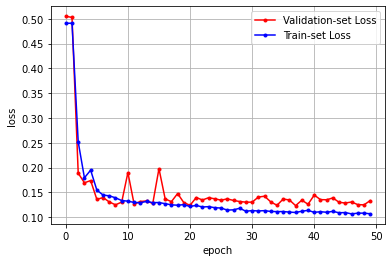

In [452]:
from keras.utils import np_utils
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()